In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
data = pd.read_csv('Dry_Bean_Dataset.csv')
pd.DataFrame(data)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


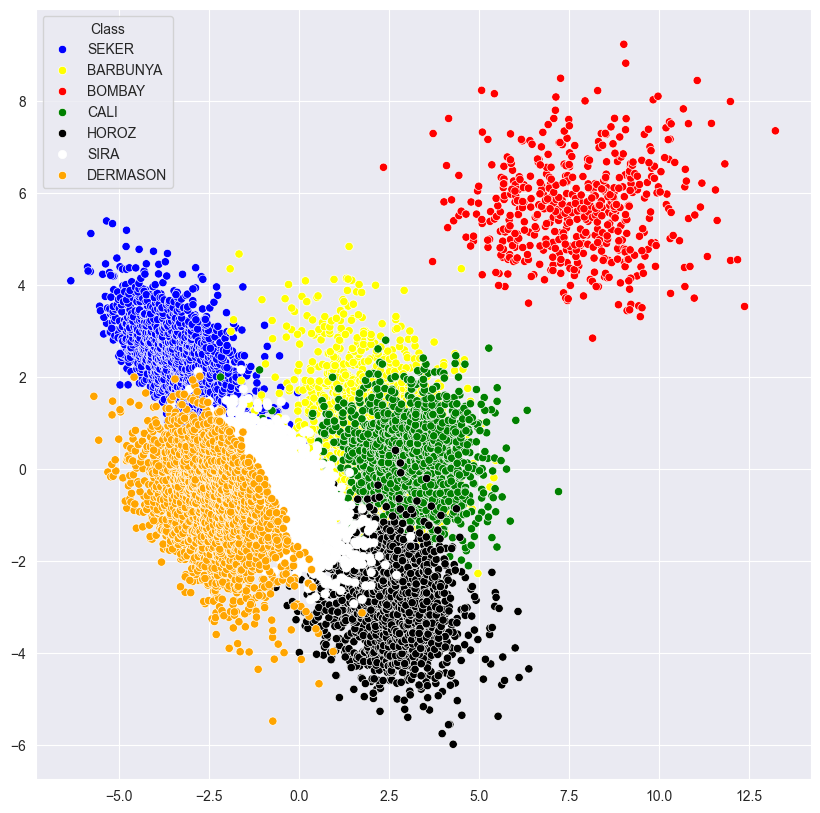

In [3]:
X = data.drop(['Class'], axis=1)
Y = data['Class']

# Standardize data
X = StandardScaler().fit_transform(X)
# PCA 
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

pc1 = X_pca[:,0]
pc2 = X_pca[:,1]

# Visualize
plt.figure(figsize=(10,10))
sns.scatterplot(x=pc1, y=pc2, hue=Y, palette=["blue", "yellow",
                                              "red", "green", "black", "white", "orange"])
plt.show()


# Original data

In [4]:
# Split train&test on original data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [5]:
def naive_bayes_model(X_train, Y_train, X_test, Y_test):
    gaussian = GaussianNB()
    gaussian.fit(X_train, Y_train)
    
    # Prediction on test data
    y_pred = gaussian.predict(X_test)
    # Accuracy on test data
    accuracy = accuracy_score(Y_test, y_pred)
    print("Accuracy on test data of Naive Bayes:", accuracy)
    # Precision on test data
    precision = precision_score(Y_test, y_pred, average='macro')
    print("Precision on test data of Naive Bayes:", precision)
    # Recall on test data
    recall = recall_score(Y_test, y_pred, average='macro')
    print("Recall on test data of Naive Bayes:", recall)

    # Prediction on train data
    y_pred = gaussian.predict(X_train)
    # Accuracy on train data
    accuracy = accuracy_score(Y_train, y_pred)
    print("\nAccuracy on train data of Naive Bayes:", accuracy)
    # Precision on train data
    precision = precision_score(Y_train, y_pred, average='macro')
    print("Precision on train data of Naive Bayes:", precision)
    # Recall on train data
    recall = recall_score(Y_train, y_pred, average='macro')
    print("Recall on train data of Naive Bayes:", recall)
naive_bayes_model(X_train, Y_train, X_test, Y_test)

Accuracy on test data of Naive Bayes: 0.8969147894221352
Precision on test data of Naive Bayes: 0.908653790402598
Recall on test data of Naive Bayes: 0.9068781578640037

Accuracy on train data of Naive Bayes: 0.8983940379972709
Precision on train data of Naive Bayes: 0.9073837684036443
Recall on train data of Naive Bayes: 0.9090657335614184


- Độ chính xác cao và gần nhau trên cả tập huấn luyện và kiểm tra cho thấy mô hình không bị overfitting hay underfitting.
- Precision cao cho thấy mô hình ít có khả năng dự đoán nhầm lẫn các lớp với nhau, có khả năng phân biệt tốt giữa các nhãn.
- Recall cao cho thấy mô hình có khả năng bao phủ tốt và có thể phát hiện phần lớn các nhãn đúng thực tế, giảm thiểu số lượng nhãn đúng bị bỏ sót.

In [6]:
def multinomial_logistic_model(X_train, Y_train, X_test, Y_test):
    softmax=LogisticRegression(solver='sag', max_iter=3000, penalty='l2')
    softmax.fit(X_train, Y_train)
    
    # Prediction
    y_pred = softmax.predict(X_test)
    # Accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    print("Accuracy on test data of Multinomial Logistic Regression:", accuracy)
    # Precision
    precision = precision_score(Y_test, y_pred, average='macro')
    print("Precision on test data of Multinomial Logistic Regression:", precision)
    # Recall
    recall = recall_score(Y_test, y_pred, average='macro')
    print("Recall on test data of Multinomial Logistic Regression:", recall)
    
    # Prediction on train data
    y_pred = softmax.predict(X_train)
    # Accuracy on train data
    accuracy = accuracy_score(Y_train, y_pred)
    print("\nAccuracy on train data of Multinomial Logistic Regression:", accuracy)
    # Precision on train data
    precision = precision_score(Y_train, y_pred, average='macro')
    print("Precision on train data of Multinomial Logistic Regression:", precision)
    # Recall on train data
    recall = recall_score(Y_train, y_pred, average='macro')
    print("Recall on train data of Multinomial Logistic Regression:", recall)
multinomial_logistic_model(X_train, Y_train, X_test, Y_test)
    

Accuracy on test data of Multinomial Logistic Regression: 0.9233594515181195
Precision on test data of Multinomial Logistic Regression: 0.9380060422229646
Recall on test data of Multinomial Logistic Regression: 0.9340115362161957

Accuracy on train data of Multinomial Logistic Regression: 0.9254749658864281
Precision on train data of Multinomial Logistic Regression: 0.9383692838391008
Recall on train data of Multinomial Logistic Regression: 0.936196079134047


- Độ chính xác cao và tương đương trên cả hai tập dữ liệu cho thấy mô hình hoạt động hiệu quả và không gặp phải vấn đề overfitting hay underfitting.
- Precision cao cho thấy mô hình có khả năng phân biệt tốt giữa các lớp, giảm thiểu số lượng dự đoán sai (các mẫu mà mô hình dự đoán là dương nhưng thực tế không phải).
- Recall cao cho thấy mô hình có khả năng phát hiện tốt các nhãn đúng thực tế, giảm thiểu số lượng nhãn đúng mà mô hình không phát hiện được.

In [7]:
def ANN_model_classification(X_train, Y_train, X_test, Y_test):
    ann = MLPClassifier(solver='adam', hidden_layer_sizes=(32,),
                        activation= 'relu', max_iter=300, random_state=1)
    ann.fit(X_train, Y_train)
    
    # Prediction
    y_pred = ann.predict(X_test)
    # Accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    print("Accuracy on test data of ANN Classification:", accuracy)
    # Precision
    precision = precision_score(Y_test, y_pred, average='macro')
    print("Precision on test data of ANN Classification:", precision)
    # Recall
    recall = recall_score(Y_test, y_pred, average='macro')
    print("Recall on test data of ANN Classification:", recall)
    
    # Prediction on train data
    y_pred = ann.predict(X_train)
    # Accuracy on train data
    accuracy = accuracy_score(Y_train, y_pred)
    print("\nAccuracy on train data of ANN Classification:", accuracy)
    # Precision on train data
    precision = precision_score(Y_train, y_pred, average='macro')
    print("Precision on train data of ANN Classification:", precision)
    # Recall on train data
    recall = recall_score(Y_train, y_pred, average='macro')
    print("Recall on train data of ANN Classification:", recall)
    
ANN_model_classification(X_train, Y_train, X_test, Y_test)

Accuracy on test data of ANN Classification: 0.9329089128305583
Precision on test data of ANN Classification: 0.9458969120941475
Recall on test data of ANN Classification: 0.9415365765557515

Accuracy on train data of ANN Classification: 0.9371260627689724
Precision on train data of ANN Classification: 0.9491562752962267
Recall on train data of ANN Classification: 0.9453675934384619


- ANN có độ chính xác cao hơn so với Naive Bayes và cao hơn một chút so với Multinomial Logistic Regression. Điều này cho thấy ANN có khả năng tổng quát tốt hơn trên tập dữ liệu này, khả năng phân loại chính xác cao hơn.
- ANN có precision cao hơn rõ rệt so với cả Naive Bayes và Multinomial Logistic Regression. Điều này có nghĩa là mô hình ANN không chỉ dự đoán chính xác hơn mà còn có khả năng phân biệt giữa các lớp tốt hơn, giảm thiểu các dự đoán sai nhãn dương.
- Recall của ANN cũng cao hơn đáng kể so với Naive Bayes và cao hơn một chút so với Multinomial Logistic Regression. Điều này cho thấy ANN có khả năng phát hiện và phân loại hầu hết các nhãn đúng trong dữ liệu, trong khi Naive Bayes có khả năng phát hiện thấp hơn nhiều.

SO SÁNH KẾT QUẢ GIỮA CÁC MÔ HÌNH 
- ANN thể hiện hiệu suất vượt trội so với cả Naive Bayes và Multinomial Logistic Regression trên các chỉ số chính.
- ANN không chỉ có độ chính xác cao hơn mà còn cho thấy khả năng phân loại tốt hơn Multinomial Logistic Regression và Naive Bayes thông qua precision và recall. Điều này cho thấy sức mạnh của mô hình ANN trong việc xử lý các bài toán phân loại phức tạp hơn, đặc biệt khi dữ liệu có các mối quan hệ phi tuyến tính.
- Tuy nhiên, ANN cũng có thể yêu cầu thời gian huấn luyện lâu hơn và cần nhiều dữ liệu hơn để đạt được hiệu suất tối ưu, trong khi Naive Bayes và Logistic Regression có thể nhanh hơn và dễ dàng hơn để triển khai trong các bài toán đơn giản.

# After Reduce Component

In [8]:
# Reduce component
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

X_pca_train, X_pca_test, Y_pca_train, Y_pca_test = train_test_split(X_pca, Y, test_size=0.3, random_state=1)

In [9]:
from sklearn.naive_bayes import GaussianNB

def naive_bayes_model(X_pca_train, Y_pca_train, X_pca_test, Y_pca_test):
    gaussian = GaussianNB()
    gaussian.fit(X_pca_train, Y_pca_train)
    
    # Prediction on test data
    y_pred = gaussian.predict(X_pca_test)
    # Accuracy on test data
    accuracy = accuracy_score(Y_pca_test, y_pred)
    print("Accuracy on test data of Naive Bayes:", accuracy)
    # Precision on test data
    precision = precision_score(Y_pca_test, y_pred, average='macro')
    print("Precision on test data of Naive Bayes:", precision)
    # Recall on test data
    recall = recall_score(Y_pca_test, y_pred, average='macro')
    print("Recall on test data of Naive Bayes:", recall)

    # Prediction on train data
    y_pred = gaussian.predict(X_pca_train)
    # Accuracy on train data
    accuracy = accuracy_score(Y_pca_train, y_pred)
    print("\nAccuracy on train data of Naive Bayes:", accuracy)
    # Precision on train data
    precision = precision_score(Y_pca_train, y_pred, average='macro')
    print("Precision on train data of Naive Bayes:", precision)
    # Recall on train data
    recall = recall_score(Y_pca_train, y_pred, average='macro')
    print("Recall on train data of Naive Bayes:", recall)
naive_bayes_model(X_pca_train, Y_pca_train, X_pca_test, Y_pca_test)

Accuracy on test data of Naive Bayes: 0.8592066601371204
Precision on test data of Naive Bayes: 0.8718922967230698
Recall on test data of Naive Bayes: 0.8650303901421326

Accuracy on train data of Naive Bayes: 0.8670095518001469
Precision on train data of Naive Bayes: 0.8756280659915634
Recall on train data of Naive Bayes: 0.871057812458454


- Naive Bayes có sự giảm sút rõ rệt về mọi chỉ số, với độ chính xác giảm gần 4% (từ 0.8969 xuống 0.8592). Điều này cho thấy mô hình này nhạy cảm với việc giảm chiều dữ liệu.

In [10]:
from sklearn.linear_model import LogisticRegression

def multinomial_logistic_model(X_pca_train, Y_pca_train, X_pca_test, Y_pca_test):
    softmax=LogisticRegression(solver='sag', max_iter=5000, penalty='l2')
    softmax.fit(X_pca_train, Y_pca_train)
    
    # Prediction
    y_pred = softmax.predict(X_pca_test)
    # Accuracy
    accuracy = accuracy_score(Y_pca_test, y_pred)
    print("Accuracy on test data of Multinomial Logistic Regression:", accuracy)
    # Precision
    precision = precision_score(Y_pca_test, y_pred, average='macro')
    print("Precision on test data of Multinomial Logistic Regression:", precision)
    # Recall
    recall = recall_score(Y_pca_test, y_pred, average='macro')
    print("Recall on test data of Multinomial Logistic Regression:", recall)
    
    # Prediction on train data
    y_pred = softmax.predict(X_pca_train)
    # Accuracy on train data
    accuracy = accuracy_score(Y_pca_train, y_pred)
    print("\nAccuracy on train data of Multinomial Logistic Regression:", accuracy)
    # Precision on train data
    precision = precision_score(Y_pca_train, y_pred, average='macro')
    print("Precision on train data of Multinomial Logistic Regression:", precision)
    # Recall on train data
    recall = recall_score(Y_pca_train, y_pred, average='macro')
    print("Recall on train data of Multinomial Logistic Regression:", recall)
multinomial_logistic_model(X_pca_train, Y_pca_train, X_pca_test, Y_pca_test)

Accuracy on test data of Multinomial Logistic Regression: 0.8888344760039177
Precision on test data of Multinomial Logistic Regression: 0.8938982587003673
Recall on test data of Multinomial Logistic Regression: 0.8862907137491854

Accuracy on train data of Multinomial Logistic Regression: 0.8918862181169308
Precision on train data of Multinomial Logistic Regression: 0.8963105954167893
Recall on train data of Multinomial Logistic Regression: 0.8926711208487302


- Độ chính xác giảm khoảng 3.5% (từ 0.9234 xuống 0.8888). Mặc dù vẫn duy trì hiệu suất tốt nhưng giảm sút này cho thấy mô hình cũng bị ảnh hưởng bởi việc giảm chiều dữ liệu.

In [11]:
from sklearn.neural_network import MLPClassifier

def ANN_model_classification(X_pca_train, Y_pca_train, X_pca_test, Y_pca_test):
    ann = MLPClassifier(solver='adam', hidden_layer_sizes=(32,), activation= 'relu', max_iter=300, random_state=1)
    ann.fit(X_pca_train, Y_pca_train)
    
    # Prediction
    y_pred = ann.predict(X_pca_test)
    # Accuracy
    accuracy = accuracy_score(Y_pca_test, y_pred)
    print("Accuracy on test data of ANN Classification:", accuracy)
    # Precision
    precision = precision_score(Y_pca_test, y_pred, average='macro')
    print("Precision on test data of ANN Classification:", precision)
    # Recall
    recall = recall_score(Y_pca_test, y_pred, average='macro')
    print("Recall on test data of ANN Classification:", recall)
    
    # Prediction on train data
    y_pred = ann.predict(X_pca_train)
    # Accuracy on train data
    accuracy = accuracy_score(Y_pca_train, y_pred)
    print("\nAccuracy on train data of ANN Classification:", accuracy)
    # Precision on train data
    precision = precision_score(Y_pca_train, y_pred, average='macro')
    print("Precision on train data of ANN Classification:", precision)
    # Recall on train data
    recall = recall_score(Y_pca_train, y_pred, average='macro')
    print("Recall on train data of ANN Classification:", recall) 
ANN_model_classification(X_pca_train, Y_pca_train, X_pca_test, Y_pca_test)

Accuracy on test data of ANN Classification: 0.8947110675808031
Precision on test data of ANN Classification: 0.899846609401563
Recall on test data of ANN Classification: 0.8929151147389792

Accuracy on train data of ANN Classification: 0.9010181589167628
Precision on train data of ANN Classification: 0.9047678453210313
Recall on train data of ANN Classification: 0.9014987873394922


- ANN có độ chính xác giảm gần 4% (từ 0.9329 xuống 0.8947), nhưng vẫn giữ được hiệu suất cao nhất trong ba mô hình sau khi giảm chiều.

NHẬN XÉT:

- Cả Naive Bayes và ANN đều bị ảnh hưởng mạnh mẽ bởi việc giảm chiều dữ liệu, với độ chính xác giảm tương tự nhau (khoảng 4%). Còn với Multinomial Logistic Regression giảm ít hơn và vẫn giữ được hiệu suất tổng thể tốt hơn. Điều này cho thấy Naive Bayes và ANN có thể không phù hợp nhất khi dữ liệu bị giảm chiều.

